<a href="https://colab.research.google.com/github/sanjay-thiyagarajan/fashion_mnist/blob/main/fashion_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fashion MNIST Classification using Convolutional Neural Networks**  
  
  Dataset - fashion_mnist (keras)

In [23]:
import tensorflow as tf #Google's Machine Learning Framework
from tensorflow import keras #Deep Learning Library under TensorFlow
from keras import Sequential #Sequential stack form for modelling
from keras.layers import Dense #Dense layers for implementing Hidden Layers in the Neural Network
import numpy as np #Library for numerical conversions and calculations
import matplotlib.pyplot as plt # Library for data visualization
from sklearn import metrics #Evaluation metrics for the model
from keras.callbacks import EarlyStopping

In [2]:
fashion_mnists = keras.datasets.fashion_mnist #MNIST Fashion Dataset is downloaded and then saved to the dataframe fashion_mnists
(train_imgs,train_labels),(test_imgs,test_labels) = fashion_mnists.load_data() #The dataframe is segmented into appropriate training and test sets.


4423680/4422102 [==============================] - 0s 0us/step


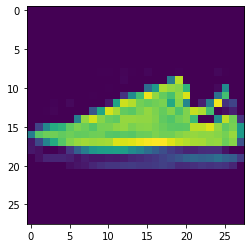

In [3]:
# CHECKING THE IMAGE
plt.imshow(train_imgs[6])

In [4]:
train_imgs = train_imgs / 255.0 #Pixel Resizing for training set
test_imgs = test_imgs / 255.0 #Pixel Resizing for test set
train_imgs = train_imgs.reshape(60000,28,28,1) #Training data is reshaped into 28x28 dimension and flatttened
test_imgs = test_imgs.reshape(10000,28,28,1) #Test data is reshaped into 28x28 dimension and flattened

In [39]:
model = Sequential([ #model is attached to a Sequential stack
                    keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)), #64 convolutional filters are applied at the first stage
                    keras.layers.MaxPool2D(2,2), #The image is then filtered to half the existing dimension 
                    keras.layers.Conv2D(32,(3,3),activation='relu'), #image is then again passed through 32 convolutional filters but with filtered features
                    keras.layers.MaxPool2D(2,2),#The image is again filtered to half the existing dimensions
                    keras.layers.Flatten(), #The feature is then flattened to push through the hidden layers
                    Dense(10, activation=tf.nn.softmax) #Hidden layer with 10 neurons for classification purpose
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc']) #Uses Adam optimizer and Sparse categorical Cross entropy
hist = model.fit(train_imgs,train_labels, validation_data=(test_imgs, test_labels), epochs=10, callbacks=EarlyStopping()) #10 epoch training is initiated

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6811 - acc: 0.7605 - val_loss: 0.4003 - val_acc: 0.8553
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3566 - acc: 0.8727 - val_loss: 0.3533 - val_acc: 0.8770
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3128 - acc: 0.8878 - val_loss: 0.3180 - val_acc: 0.8863
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2909 - acc: 0.8946 - val_loss: 0.3044 - val_acc: 0.8920
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2574 - acc: 0.9070 - val_loss: 0.2921 - val_acc: 0.8936
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2494 - acc: 0.9085 - val_loss: 0.3018 - val_acc: 0.8893


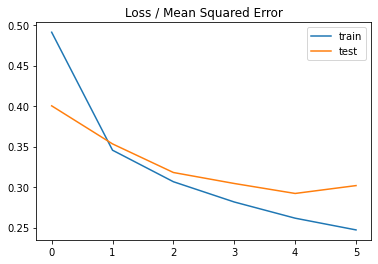

In [40]:
plt.title('Loss / Mean Squared Error')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()
plt.show()

In [41]:
model.evaluate(test_imgs,test_labels) #Model is evaluated with Loss and Accuracy as parameters
pred =  model.predict(test_imgs)

313/313 [==============================] - 1s 3ms/step - loss: 0.3018 - acc: 0.8893
